In [1]:
import pandas as pd

di_df=pd.read_csv('diabetes.csv')

di_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
di_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
di_df.shape

(768, 9)

In [4]:
di_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
di_df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Train-Test Split

In [6]:
y=di_df['Outcome']

di_df.drop(columns=['Outcome'],inplace=True)

di_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(di_df,y,test_size=0.2,random_state=42)

X_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [8]:
X_test

len(X_test)

154

In [9]:
Y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [10]:
Y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train,Y_train)

pred=logreg.predict(X_test)

pred

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [12]:
probabs=logreg.predict_proba(X_test)    #Returns the probability

probabs

array([[0.71392379, 0.28607621],
       [0.80464797, 0.19535203],
       [0.88366775, 0.11633225],
       [0.83258482, 0.16741518],
       [0.53086932, 0.46913068],
       [0.55060145, 0.44939855],
       [0.98342176, 0.01657824],
       [0.3569886 , 0.6430114 ],
       [0.45620756, 0.54379244],
       [0.23311548, 0.76688452],
       [0.73169848, 0.26830152],
       [0.10523446, 0.89476554],
       [0.65466236, 0.34533764],
       [0.6941769 , 0.3058231 ],
       [0.91448009, 0.08551991],
       [0.61504922, 0.38495078],
       [0.85403771, 0.14596229],
       [0.91968203, 0.08031797],
       [0.14154376, 0.85845624],
       [0.4402977 , 0.5597023 ],
       [0.79082361, 0.20917639],
       [0.91886731, 0.08113269],
       [0.43843349, 0.56156651],
       [0.90101292, 0.09898708],
       [0.44836629, 0.55163371],
       [0.11581539, 0.88418461],
       [0.86867474, 0.13132526],
       [0.96842081, 0.03157919],
       [0.738425  , 0.261575  ],
       [0.88093266, 0.11906734],
       [0.

In [13]:
pos_probabs=probabs[::,1]

pos_probabs

array([0.28607621, 0.19535203, 0.11633225, 0.16741518, 0.46913068,
       0.44939855, 0.01657824, 0.6430114 , 0.54379244, 0.76688452,
       0.26830152, 0.89476554, 0.34533764, 0.3058231 , 0.08551991,
       0.38495078, 0.14596229, 0.08031797, 0.85845624, 0.5597023 ,
       0.20917639, 0.08113269, 0.56156651, 0.09898708, 0.55163371,
       0.88418461, 0.13132526, 0.03157919, 0.261575  , 0.11906734,
       0.90970032, 0.8612984 , 0.76783543, 0.82474804, 0.60355127,
       0.69055162, 0.96755468, 0.24417844, 0.51811121, 0.72399883,
       0.07390026, 0.57585953, 0.58120395, 0.33731935, 0.0294308 ,
       0.50733177, 0.64040399, 0.23503447, 0.3581531 , 0.9527586 ,
       0.05232136, 0.66612383, 0.8188267 , 0.24393604, 0.0960522 ,
       0.04474228, 0.76742126, 0.00610089, 0.41284968, 0.74898211,
       0.74283742, 0.35539616, 0.19532131, 0.21507757, 0.08117526,
       0.63037907, 0.05366109, 0.7277968 , 0.03749605, 0.72108327,
       0.68286568, 0.07378113, 0.18470911, 0.11815558, 0.09443

# Area Under Curve

In [14]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,pos_probabs)

fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.01010101, 0.01010101,
        0.02020202, 0.02020202, 0.04040404, 0.04040404, 0.05050505,
        0.05050505, 0.06060606, 0.06060606, 0.07070707, 0.07070707,
        0.09090909, 0.09090909, 0.1010101 , 0.1010101 , 0.15151515,
        0.15151515, 0.16161616, 0.16161616, 0.17171717, 0.17171717,
        0.21212121, 0.21212121, 0.26262626, 0.26262626, 0.28282828,
        0.28282828, 0.32323232, 0.32323232, 0.33333333, 0.33333333,
        0.35353535, 0.35353535, 0.38383838, 0.38383838, 0.4040404 ,
        0.4040404 , 0.41414141, 0.41414141, 0.44444444, 0.44444444,
        0.46464646, 0.46464646, 0.55555556, 0.55555556, 0.56565657,
        0.56565657, 0.5959596 , 0.5959596 , 0.64646465, 0.64646465,
        0.8989899 , 0.8989899 , 1.        ]),
 array([0.        , 0.01818182, 0.03636364, 0.03636364, 0.07272727,
        0.07272727, 0.32727273, 0.32727273, 0.43636364, 0.43636364,
        0.47272727, 0.47272727, 0.50909091, 0.50909091, 0.54545455,
  

0.7303030303030302

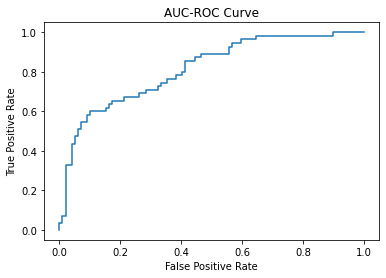

In [15]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

roc_auc_score(Y_test,pred)

# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

confusion_matrix(Y_test,pred)

array([[78, 21],
       [18, 37]], dtype=int64)

In [17]:
precision_score(Y_test,pred)

0.6379310344827587

In [18]:
recall_score(Y_test,pred)

0.6727272727272727

In [19]:
f1_score(Y_test,pred)

0.6548672566371682

# K-Means Clustering

In [20]:
from sklearn.cluster import KMeans

kmc=KMeans()

kmc.fit_predict(X_train)

n_clust=range(1,11)
inertias=[]

for n in n_clust:
    kmc=KMeans(n_clusters=n)
    kmc.fit_predict(X_train)
    inertias.append(kmc.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Curve')

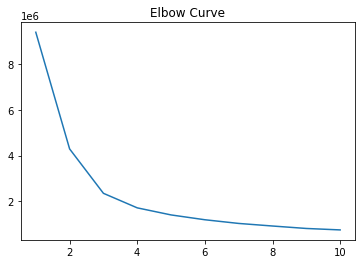

In [21]:
import matplotlib.pyplot as plt

plt.plot(n_clust,inertias)

plt.title('Elbow Curve')

# GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()

param_dict={
            'max_depth':[4,5,6,7,8],
            'min_samples_split':[3,4,5,6,7],
            'min_samples_leaf':[3,4,5,6],
            'max_leaf_nodes':[6,7,8,9]
             }

gcv=GridSearchCV(dtc,param_dict,cv=7,verbose=10)

gcv.fit(X_train,Y_train)


Fitting 7 folds for each of 400 candidates, totalling 2800 fits
[CV 1/7; 1/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 1/7; 1/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/7; 1/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 2/7; 1/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/7; 1/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 3/7; 1/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 4/7; 1/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 4/7; 1/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/7; 1/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 5/7; 1/400] END max_dep

[CV 4/7; 9/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/7; 9/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6
[CV 5/7; 9/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 6/7; 9/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6
[CV 6/7; 9/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 7/7; 9/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6
[CV 7/7; 9/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/7; 10/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7
[CV 1/7; 10/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 2/7; 10/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=

[CV 3/7; 16/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/7; 16/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3
[CV 4/7; 16/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/7; 16/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3
[CV 5/7; 16/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 6/7; 16/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3
[CV 6/7; 16/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 7/7; 16/400] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3
[CV 7/7; 16/400] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/7; 17/400] START max_depth=4, max_leaf_nodes=6, min_sample

[CV 2/7; 23/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/7; 23/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 3/7; 23/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/7; 23/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 4/7; 23/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/7; 23/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 5/7; 23/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 6/7; 23/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 6/7; 23/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 7/7; 23/400] START max_depth=4, max_leaf_nodes=7, min_sample

[CV 7/7; 29/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/7; 30/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 1/7; 30/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 2/7; 30/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 2/7; 30/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 3/7; 30/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 3/7; 30/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/7; 30/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 4/7; 30/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/7; 30/400] START max_depth=4, max_leaf_nodes=7, min_sample

[CV 1/7; 36/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/7; 36/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 2/7; 36/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/7; 36/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 3/7; 36/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/7; 36/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 4/7; 36/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/7; 36/400] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 5/7; 36/400] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 6/7; 36/400] START max_depth=4, max_leaf_nodes=7, min_sample

[CV 7/7; 42/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/7; 43/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5
[CV 1/7; 43/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 2/7; 43/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5
[CV 2/7; 43/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/7; 43/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5
[CV 3/7; 43/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/7; 43/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5
[CV 4/7; 43/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/7; 43/400] START max_depth=4, max_leaf_nodes=8, min_sample

[CV 7/7; 49/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/7; 50/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7
[CV 1/7; 50/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 2/7; 50/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7
[CV 2/7; 50/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 3/7; 50/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7
[CV 3/7; 50/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/7; 50/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7
[CV 4/7; 50/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/7; 50/400] START max_depth=4, max_leaf_nodes=8, min_sample

[CV 6/7; 56/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 7/7; 56/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3
[CV 7/7; 56/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/7; 57/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4
[CV 1/7; 57/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 2/7; 57/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4
[CV 2/7; 57/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 3/7; 57/400] START max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4
[CV 3/7; 57/400] END max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 4/7; 57/400] START max_depth=4, max_leaf_nodes=8, min_sample

[CV 6/7; 63/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 7/7; 63/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5
[CV 7/7; 63/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 1/7; 64/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6
[CV 1/7; 64/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 2/7; 64/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6
[CV 2/7; 64/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 3/7; 64/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6
[CV 3/7; 64/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 4/7; 64/400] START max_depth=4, max_leaf_nodes=9, min_sample

[CV 6/7; 70/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 7/7; 70/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7
[CV 7/7; 70/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/7; 71/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3
[CV 1/7; 71/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/7; 71/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3
[CV 2/7; 71/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/7; 71/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3
[CV 3/7; 71/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 4/7; 71/400] START max_depth=4, max_leaf_nodes=9, min_sample

[CV 1/7; 78/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 2/7; 78/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5
[CV 2/7; 78/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/7; 78/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5
[CV 3/7; 78/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 4/7; 78/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5
[CV 4/7; 78/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 5/7; 78/400] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5
[CV 5/7; 78/400] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 6/7; 78/400] START max_depth=4, max_leaf_nodes=9, min_sample

[CV 7/7; 84/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 1/7; 85/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7
[CV 1/7; 85/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 2/7; 85/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7
[CV 2/7; 85/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 3/7; 85/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7
[CV 3/7; 85/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 4/7; 85/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7
[CV 4/7; 85/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 5/7; 85/400] START max_depth=5, max_leaf_nodes=6, min_sample

[CV 2/7; 92/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 3/7; 92/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 3/7; 92/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 4/7; 92/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 4/7; 92/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 5/7; 92/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 5/7; 92/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 6/7; 92/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 6/7; 92/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 7/7; 92/400] START max_depth=5, max_leaf_nodes=6, min_sample

[CV 1/7; 99/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 2/7; 99/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 2/7; 99/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 3/7; 99/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 3/7; 99/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 4/7; 99/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 4/7; 99/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 5/7; 99/400] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 5/7; 99/400] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 6/7; 99/400] START max_depth=5, max_leaf_nodes=6, min_sample

[CV 1/7; 105/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 2/7; 105/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 2/7; 105/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 3/7; 105/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 3/7; 105/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 4/7; 105/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 4/7; 105/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 5/7; 105/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 5/7; 105/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 6/7; 105/400] START max_depth=5, max_leaf_nodes=7, 

[CV 6/7; 111/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 7/7; 111/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3
[CV 7/7; 111/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 1/7; 112/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4
[CV 1/7; 112/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 2/7; 112/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4
[CV 2/7; 112/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 3/7; 112/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4
[CV 3/7; 112/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 4/7; 112/400] START max_depth=5, max_leaf_nodes=7, 

[CV 5/7; 118/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 6/7; 118/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5
[CV 6/7; 118/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 7/7; 118/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5
[CV 7/7; 118/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 1/7; 119/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6
[CV 1/7; 119/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 2/7; 119/400] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6
[CV 2/7; 119/400] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 3/7; 119/400] START max_depth=5, max_leaf_nodes=7, 

[CV 4/7; 124/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 5/7; 124/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6
[CV 5/7; 124/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 6/7; 124/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6
[CV 6/7; 124/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 7/7; 124/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6
[CV 7/7; 124/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 1/7; 125/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7
[CV 1/7; 125/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 2/7; 125/400] START max_depth=5, max_leaf_nodes=8, 

[CV 4/7; 131/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 5/7; 131/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3
[CV 5/7; 131/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 6/7; 131/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3
[CV 6/7; 131/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 7/7; 131/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3
[CV 7/7; 131/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 1/7; 132/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4
[CV 1/7; 132/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 2/7; 132/400] START max_depth=5, max_leaf_nodes=8, 

[CV 7/7; 137/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 1/7; 138/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5
[CV 1/7; 138/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 2/7; 138/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5
[CV 2/7; 138/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/7; 138/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5
[CV 3/7; 138/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 4/7; 138/400] START max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5
[CV 4/7; 138/400] END max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 5/7; 138/400] START max_depth=5, max_leaf_nodes=8, 

[CV 4/7; 144/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 5/7; 144/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6
[CV 5/7; 144/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 6/7; 144/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6
[CV 6/7; 144/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 7/7; 144/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6
[CV 7/7; 144/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 1/7; 145/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7
[CV 1/7; 145/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 2/7; 145/400] START max_depth=5, max_leaf_nodes=9, 

[CV 1/7; 151/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/7; 151/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3
[CV 2/7; 151/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/7; 151/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3
[CV 3/7; 151/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 4/7; 151/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3
[CV 4/7; 151/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 5/7; 151/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3
[CV 5/7; 151/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 6/7; 151/400] START max_depth=5, max_leaf_nodes=9, 

[CV 1/7; 158/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 2/7; 158/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5
[CV 2/7; 158/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/7; 158/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5
[CV 3/7; 158/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 4/7; 158/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5
[CV 4/7; 158/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 5/7; 158/400] START max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5
[CV 5/7; 158/400] END max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 6/7; 158/400] START max_depth=5, max_leaf_nodes=9, 

[CV 2/7; 164/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 3/7; 164/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 3/7; 164/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 4/7; 164/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 4/7; 164/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 5/7; 164/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 5/7; 164/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 6/7; 164/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 6/7; 164/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 7/7; 164/400] START max_depth=6, max_leaf_nodes=6, 

[CV 7/7; 169/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6
[CV 7/7; 169/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/7; 170/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7
[CV 1/7; 170/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 2/7; 170/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7
[CV 2/7; 170/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 3/7; 170/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7
[CV 3/7; 170/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/7; 170/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7
[CV 4/7; 170/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, 

[CV 4/7; 176/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/7; 176/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3
[CV 5/7; 176/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 6/7; 176/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3
[CV 6/7; 176/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 7/7; 176/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3
[CV 7/7; 176/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/7; 177/400] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4
[CV 1/7; 177/400] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 2/7; 177/400] START max_depth=6, max_leaf_nodes=6, 

[CV 6/7; 183/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 7/7; 183/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 7/7; 183/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 1/7; 184/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 1/7; 184/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 2/7; 184/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 2/7; 184/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 3/7; 184/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 3/7; 184/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 4/7; 184/400] START max_depth=6, max_leaf_nodes=7, 

[CV 3/7; 190/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/7; 190/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 4/7; 190/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/7; 190/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 5/7; 190/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 6/7; 190/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 6/7; 190/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 7/7; 190/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 7/7; 190/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/7; 191/400] START max_depth=6, max_leaf_nodes=7, 

[CV 6/7; 197/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 7/7; 197/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 7/7; 197/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 1/7; 198/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5
[CV 1/7; 198/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 2/7; 198/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5
[CV 2/7; 198/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/7; 198/400] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5
[CV 3/7; 198/400] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 4/7; 198/400] START max_depth=6, max_leaf_nodes=7, 

[CV 2/7; 204/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 3/7; 204/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6
[CV 3/7; 204/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 4/7; 204/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6
[CV 4/7; 204/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 5/7; 204/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6
[CV 5/7; 204/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 6/7; 204/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6
[CV 6/7; 204/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 7/7; 204/400] START max_depth=6, max_leaf_nodes=8, 

[CV 7/7; 210/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/7; 211/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3
[CV 1/7; 211/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/7; 211/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3
[CV 2/7; 211/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/7; 211/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3
[CV 3/7; 211/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 4/7; 211/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3
[CV 4/7; 211/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 5/7; 211/400] START max_depth=6, max_leaf_nodes=8, 

[CV 4/7; 217/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4
[CV 4/7; 217/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 5/7; 217/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4
[CV 5/7; 217/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 6/7; 217/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4
[CV 6/7; 217/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 7/7; 217/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4
[CV 7/7; 217/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 1/7; 218/400] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5
[CV 1/7; 218/400] END max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, 

[CV 5/7; 223/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5
[CV 5/7; 223/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 6/7; 223/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5
[CV 6/7; 223/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 7/7; 223/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5
[CV 7/7; 223/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 1/7; 224/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6
[CV 1/7; 224/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 2/7; 224/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6
[CV 2/7; 224/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, 

[CV 2/7; 229/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/7; 229/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 3/7; 229/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/7; 229/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 4/7; 229/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/7; 229/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 5/7; 229/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 6/7; 229/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 6/7; 229/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 7/7; 229/400] START max_depth=6, max_leaf_nodes=9, 

[CV 6/7; 235/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 7/7; 235/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7
[CV 7/7; 235/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 1/7; 236/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3
[CV 1/7; 236/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/7; 236/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3
[CV 2/7; 236/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/7; 236/400] START max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3
[CV 3/7; 236/400] END max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/7; 236/400] START max_depth=6, max_leaf_nodes=9, 

[CV 5/7; 243/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 6/7; 243/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5
[CV 6/7; 243/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 7/7; 243/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5
[CV 7/7; 243/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 1/7; 244/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 1/7; 244/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 2/7; 244/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 2/7; 244/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 3/7; 244/400] START max_depth=7, max_leaf_nodes=6, 

[CV 4/7; 252/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 5/7; 252/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 5/7; 252/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 6/7; 252/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 6/7; 252/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 7/7; 252/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 7/7; 252/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 1/7; 253/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5
[CV 1/7; 253/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 2/7; 253/400] START max_depth=7, max_leaf_nodes=6, 

[CV 7/7; 259/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 1/7; 260/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7
[CV 1/7; 260/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 2/7; 260/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7
[CV 2/7; 260/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 3/7; 260/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7
[CV 3/7; 260/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 4/7; 260/400] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7
[CV 4/7; 260/400] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 5/7; 260/400] START max_depth=7, max_leaf_nodes=6, 

[CV 5/7; 265/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 6/7; 265/400] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 6/7; 265/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 7/7; 265/400] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 7/7; 265/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 1/7; 266/400] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3
[CV 1/7; 266/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/7; 266/400] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3
[CV 2/7; 266/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/7; 266/400] START max_depth=7, max_leaf_nodes=7, 

[CV 1/7; 274/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 2/7; 274/400] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6
[CV 2/7; 274/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 3/7; 274/400] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6
[CV 3/7; 274/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 4/7; 274/400] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6
[CV 4/7; 274/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 5/7; 274/400] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6
[CV 5/7; 274/400] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 6/7; 274/400] START max_depth=7, max_leaf_nodes=7, 

[CV 4/7; 281/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/7; 281/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3
[CV 5/7; 281/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 6/7; 281/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3
[CV 6/7; 281/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 7/7; 281/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3
[CV 7/7; 281/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/7; 282/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4
[CV 1/7; 282/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/7; 282/400] START max_depth=7, max_leaf_nodes=8, 

[CV 3/7; 287/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/7; 287/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4
[CV 4/7; 287/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/7; 287/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4
[CV 5/7; 287/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 6/7; 287/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4
[CV 6/7; 287/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 7/7; 287/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4
[CV 7/7; 287/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 1/7; 288/400] START max_depth=7, max_leaf_nodes=8, 

[CV 3/7; 295/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 4/7; 295/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7
[CV 4/7; 295/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 5/7; 295/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7
[CV 5/7; 295/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 6/7; 295/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7
[CV 6/7; 295/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 7/7; 295/400] START max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7
[CV 7/7; 295/400] END max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 1/7; 296/400] START max_depth=7, max_leaf_nodes=8, 

[CV 3/7; 302/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/7; 302/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4
[CV 4/7; 302/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 5/7; 302/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4
[CV 5/7; 302/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 6/7; 302/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4
[CV 6/7; 302/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 7/7; 302/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4
[CV 7/7; 302/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/7; 303/400] START max_depth=7, max_leaf_nodes=9, 

[CV 3/7; 309/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/7; 309/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 4/7; 309/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/7; 309/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 5/7; 309/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 6/7; 309/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 6/7; 309/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 7/7; 309/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 7/7; 309/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/7; 310/400] START max_depth=7, max_leaf_nodes=9, 

[CV 4/7; 315/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 5/7; 315/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7
[CV 5/7; 315/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 6/7; 315/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7
[CV 6/7; 315/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 7/7; 315/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7
[CV 7/7; 315/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 1/7; 316/400] START max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3
[CV 1/7; 316/400] END max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/7; 316/400] START max_depth=7, max_leaf_nodes=9, 

[CV 3/7; 322/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/7; 322/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4
[CV 4/7; 322/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 5/7; 322/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4
[CV 5/7; 322/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 6/7; 322/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4
[CV 6/7; 322/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 7/7; 322/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4
[CV 7/7; 322/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/7; 323/400] START max_depth=8, max_leaf_nodes=6, 

[CV 6/7; 330/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 7/7; 330/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7
[CV 7/7; 330/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/7; 331/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 1/7; 331/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/7; 331/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 2/7; 331/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/7; 331/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 3/7; 331/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 4/7; 331/400] START max_depth=8, max_leaf_nodes=6, 

[CV 5/7; 338/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 6/7; 338/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 6/7; 338/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 7/7; 338/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 7/7; 338/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 1/7; 339/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 1/7; 339/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 2/7; 339/400] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 2/7; 339/400] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 3/7; 339/400] START max_depth=8, max_leaf_nodes=6, 

[CV 3/7; 344/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 4/7; 344/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 4/7; 344/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 5/7; 344/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 5/7; 344/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 6/7; 344/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 6/7; 344/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 7/7; 344/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 7/7; 344/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 1/7; 345/400] START max_depth=8, max_leaf_nodes=7, 

[CV 3/7; 350/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/7; 350/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 4/7; 350/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/7; 350/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 5/7; 350/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 6/7; 350/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 6/7; 350/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 7/7; 350/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 7/7; 350/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/7; 351/400] START max_depth=8, max_leaf_nodes=7, 

[CV 2/7; 357/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 2/7; 357/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 3/7; 357/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 3/7; 357/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 4/7; 357/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 4/7; 357/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 5/7; 357/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 5/7; 357/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 6/7; 357/400] START max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 6/7; 357/400] END max_depth=8, max_leaf_nodes=7, min_samples_leaf=6, 

[CV 7/7; 362/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/7; 363/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5
[CV 1/7; 363/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 2/7; 363/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5
[CV 2/7; 363/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/7; 363/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5
[CV 3/7; 363/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/7; 363/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5
[CV 4/7; 363/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/7; 363/400] START max_depth=8, max_leaf_nodes=8, 

[CV 2/7; 369/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/7; 369/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6
[CV 3/7; 369/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/7; 369/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6
[CV 4/7; 369/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/7; 369/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6
[CV 5/7; 369/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 6/7; 369/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6
[CV 6/7; 369/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 7/7; 369/400] START max_depth=8, max_leaf_nodes=8, 

[CV 7/7; 375/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7
[CV 7/7; 375/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 1/7; 376/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3
[CV 1/7; 376/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/7; 376/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3
[CV 2/7; 376/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/7; 376/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3
[CV 3/7; 376/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/7; 376/400] START max_depth=8, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3
[CV 4/7; 376/400] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=6, 

[CV 6/7; 381/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 7/7; 381/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3
[CV 7/7; 381/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/7; 382/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4
[CV 1/7; 382/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/7; 382/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4
[CV 2/7; 382/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/7; 382/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4
[CV 3/7; 382/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/7; 382/400] START max_depth=8, max_leaf_nodes=9, 

[CV 2/7; 389/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/7; 389/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 3/7; 389/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/7; 389/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 4/7; 389/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/7; 389/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 5/7; 389/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 6/7; 389/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6
[CV 6/7; 389/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 7/7; 389/400] START max_depth=8, max_leaf_nodes=9, 

[CV 2/7; 395/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 3/7; 395/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7
[CV 3/7; 395/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 4/7; 395/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7
[CV 4/7; 395/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 5/7; 395/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7
[CV 5/7; 395/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 6/7; 395/400] START max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7
[CV 6/7; 395/400] END max_depth=8, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 7/7; 395/400] START max_depth=8, max_leaf_nodes=9, 

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             verbose=10)

In [23]:
gcv.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [24]:
gcv.best_score_

0.7491976414390207

# RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV

rsv=RandomizedSearchCV(dtc,param_dict,cv=7,verbose=10, n_iter=10)

rsv.fit(X_train,Y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV 1/7; 1/10] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3
[CV 1/7; 1/10] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/7; 1/10] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3
[CV 2/7; 1/10] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/7; 1/10] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3
[CV 3/7; 1/10] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/7; 1/10] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3
[CV 4/7; 1/10] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 5/7; 1/10] START max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3
[CV 5/7; 1/10] END max_depth=4, max_lea

[CV 3/7; 8/10] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/7; 8/10] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 4/7; 8/10] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/7; 8/10] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 5/7; 8/10] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 6/7; 8/10] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 6/7; 8/10] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 7/7; 8/10] START max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 7/7; 8/10] END max_depth=8, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 1/7; 9/10] START max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_sample

RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_leaf_nodes': [6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7]},
                   verbose=10)

In [26]:
rsv.best_score_

0.7491976414390207

In [27]:
rsv.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 7,
 'max_depth': 8}

# Random forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
rfc_pred=rfc.predict(X_test)  #returns the probability

rfc_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [30]:
rfc_probabs=rfc.predict_proba(X_test)    #Returns the probability

rfc_probabs

array([[0.67, 0.33],
       [0.79, 0.21],
       [0.88, 0.12],
       [0.77, 0.23],
       [0.56, 0.44],
       [0.47, 0.53],
       [0.99, 0.01],
       [0.28, 0.72],
       [0.43, 0.57],
       [0.4 , 0.6 ],
       [0.76, 0.24],
       [0.26, 0.74],
       [0.69, 0.31],
       [0.41, 0.59],
       [1.  , 0.  ],
       [0.6 , 0.4 ],
       [0.86, 0.14],
       [0.97, 0.03],
       [0.48, 0.52],
       [0.49, 0.51],
       [0.6 , 0.4 ],
       [0.94, 0.06],
       [0.7 , 0.3 ],
       [0.96, 0.04],
       [0.44, 0.56],
       [0.08, 0.92],
       [0.92, 0.08],
       [0.95, 0.05],
       [0.94, 0.06],
       [0.79, 0.21],
       [0.39, 0.61],
       [0.37, 0.63],
       [0.2 , 0.8 ],
       [0.21, 0.79],
       [0.57, 0.43],
       [0.21, 0.79],
       [0.2 , 0.8 ],
       [0.46, 0.54],
       [0.75, 0.25],
       [0.33, 0.67],
       [0.91, 0.09],
       [0.76, 0.24],
       [0.23, 0.77],
       [0.54, 0.46],
       [0.94, 0.06],
       [0.33, 0.67],
       [0.41, 0.59],
       [0.77,

In [31]:
rfc_pos_probabs=rfc_probabs[::,1]

rfc_pos_probabs

array([0.33, 0.21, 0.12, 0.23, 0.44, 0.53, 0.01, 0.72, 0.57, 0.6 , 0.24,
       0.74, 0.31, 0.59, 0.  , 0.4 , 0.14, 0.03, 0.52, 0.51, 0.4 , 0.06,
       0.3 , 0.04, 0.56, 0.92, 0.08, 0.05, 0.06, 0.21, 0.61, 0.63, 0.8 ,
       0.79, 0.43, 0.79, 0.8 , 0.54, 0.25, 0.67, 0.09, 0.24, 0.77, 0.46,
       0.06, 0.67, 0.59, 0.23, 0.18, 0.91, 0.03, 0.85, 0.74, 0.29, 0.1 ,
       0.04, 0.53, 0.02, 0.25, 0.76, 0.62, 0.29, 0.34, 0.32, 0.03, 0.71,
       0.  , 0.58, 0.04, 0.78, 0.71, 0.16, 0.1 , 0.04, 0.09, 0.44, 0.28,
       0.15, 0.19, 0.21, 0.58, 0.16, 0.12, 0.6 , 0.35, 0.9 , 0.65, 0.45,
       0.25, 0.04, 0.02, 0.15, 0.  , 0.54, 0.39, 0.56, 0.6 , 0.07, 0.77,
       0.1 , 0.86, 0.04, 0.53, 0.55, 0.82, 0.15, 0.24, 0.9 , 0.22, 0.75,
       0.06, 0.59, 0.24, 0.88, 0.27, 0.47, 0.69, 0.37, 0.  , 0.54, 0.02,
       0.23, 0.4 , 0.08, 0.29, 0.39, 0.26, 0.86, 0.73, 0.68, 0.55, 0.69,
       0.03, 0.43, 0.81, 0.34, 0.28, 0.66, 0.8 , 0.  , 0.03, 0.01, 0.3 ,
       0.49, 0.1 , 0.38, 0.24, 0.04, 0.39, 0.81, 0.

In [32]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,rfc_pos_probabs)

fpr,tpr,thresholds

(array([0.        , 0.        , 0.01010101, 0.01010101, 0.01010101,
        0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
        0.02020202, 0.03030303, 0.03030303, 0.04040404, 0.04040404,
        0.05050505, 0.07070707, 0.07070707, 0.08080808, 0.08080808,
        0.08080808, 0.11111111, 0.13131313, 0.13131313, 0.14141414,
        0.16161616, 0.17171717, 0.18181818, 0.2020202 , 0.2020202 ,
        0.21212121, 0.23232323, 0.23232323, 0.25252525, 0.26262626,
        0.27272727, 0.28282828, 0.31313131, 0.34343434, 0.36363636,
        0.37373737, 0.37373737, 0.39393939, 0.41414141, 0.42424242,
        0.43434343, 0.43434343, 0.46464646, 0.49494949, 0.52525253,
        0.53535354, 0.56565657, 0.58585859, 0.5959596 , 0.62626263,
        0.63636364, 0.65656566, 0.6969697 , 0.73737374, 0.74747475,
        0.77777778, 0.78787879, 0.84848485, 0.8989899 , 0.92929293,
        0.94949495, 1.        ]),
 array([0.        , 0.01818182, 0.01818182, 0.05454545, 0.07272727,
        0.0909

0.7444444444444445

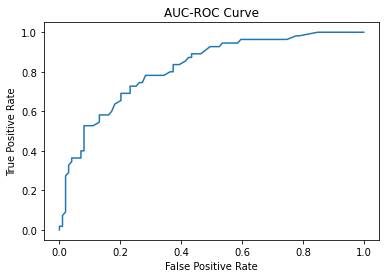

In [33]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

roc_auc_score(Y_test,rfc_pred)

In [34]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

confusion_matrix(Y_test,rfc_pred)

array([[79, 20],
       [17, 38]], dtype=int64)

In [35]:
precision_score(Y_test,rfc_pred)

0.6551724137931034

In [36]:
recall_score(Y_test,rfc_pred)

0.6909090909090909

In [37]:
f1_score(Y_test,rfc_pred)

0.6725663716814159

In [38]:
from sklearn.metrics import accuracy_score

print("Test accuracy :",accuracy_score(Y_test,rfc_pred))

Test accuracy : 0.7597402597402597


In [39]:
rfc_train_pred=rfc.predict(X_train) 

print("Train accuracy :",accuracy_score(Y_train,rfc_train_pred))

Train accuracy : 1.0


In [40]:
#hypermeter tuning

from sklearn.model_selection import GridSearchCV

param_dict={
            'max_depth':[4,5,6],
            'min_samples_split':[3,4,5],
            'min_samples_leaf':[3,4],
            'max_leaf_nodes':[6,7]
             }

rfc_gcv=GridSearchCV(rfc,param_dict,cv=7,verbose=10)

rfc_gcv.fit(X_train,Y_train)

Fitting 7 folds for each of 36 candidates, totalling 252 fits
[CV 1/7; 1/36] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 1/7; 1/36] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV 2/7; 1/36] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 2/7; 1/36] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.3s
[CV 3/7; 1/36] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 3/7; 1/36] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV 4/7; 1/36] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 4/7; 1/36] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV 5/7; 1/36] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 5/7; 1/36] END max_depth=4, max_le

[CV 6/7; 6/36] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV 7/7; 6/36] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 7/7; 6/36] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 1/7; 7/36] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3
[CV 1/7; 7/36] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV 2/7; 7/36] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3
[CV 2/7; 7/36] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV 3/7; 7/36] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3
[CV 3/7; 7/36] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV 4/7; 7/36] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_sample

[CV 5/7; 12/36] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 6/7; 12/36] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 6/7; 12/36] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 7/7; 12/36] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 7/7; 12/36] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 1/7; 13/36] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 1/7; 13/36] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV 2/7; 13/36] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 2/7; 13/36] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV 3/7; 13/36] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, 

[CV 4/7; 18/36] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 5/7; 18/36] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 5/7; 18/36] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 6/7; 18/36] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 6/7; 18/36] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 7/7; 18/36] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 7/7; 18/36] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 1/7; 19/36] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3
[CV 1/7; 19/36] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV 2/7; 19/36] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, 

[CV 4/7; 24/36] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 5/7; 24/36] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 5/7; 24/36] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 6/7; 24/36] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 6/7; 24/36] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 7/7; 24/36] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 7/7; 24/36] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 1/7; 25/36] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 1/7; 25/36] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV 2/7; 25/36] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, 

[CV 3/7; 30/36] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 4/7; 30/36] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 4/7; 30/36] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 5/7; 30/36] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 5/7; 30/36] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 6/7; 30/36] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 6/7; 30/36] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 7/7; 30/36] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 7/7; 30/36] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 1/7; 31/36] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, 

[CV 3/7; 36/36] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 4/7; 36/36] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 4/7; 36/36] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 5/7; 36/36] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 5/7; 36/36] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 6/7; 36/36] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 6/7; 36/36] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV 7/7; 36/36] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5
[CV 7/7; 36/36] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5; total time=   0.1s


GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6], 'max_leaf_nodes': [6, 7],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4, 5]},
             verbose=10)

In [41]:
rfc_gcv.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [42]:
rfc_gcv.best_score_

0.7654687266756232

In [43]:
rfc_gcv_test_pred=rfc_gcv.predict(X_test) 
rfc_gcv_train_pred=rfc_gcv.predict(X_train) 

print("Test accuracy :",accuracy_score(Y_test,rfc_gcv_test_pred))
print("Train accuracy :",accuracy_score(Y_train,rfc_gcv_train_pred))

Test accuracy : 0.7857142857142857
Train accuracy : 0.7964169381107492


# Adaboosting

In [46]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()

#gridsearchcv
abc_param_dict={'n_estimators':[100,150,200,250],'learning_rate':[0.2]}
grid_abc=GridSearchCV(abc,abc_param_dict,verbose=26,cv=7)

grid_abc.fit(X_train,Y_train)

Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV 1/7; 1/4] START learning_rate=0.2, n_estimators=100.........................
[CV 1/7; 1/4] END .......learning_rate=0.2, n_estimators=100; total time=   0.2s
[CV 2/7; 1/4] START learning_rate=0.2, n_estimators=100.........................
[CV 2/7; 1/4] END .......learning_rate=0.2, n_estimators=100; total time=   0.1s
[CV 3/7; 1/4] START learning_rate=0.2, n_estimators=100.........................
[CV 3/7; 1/4] END .......learning_rate=0.2, n_estimators=100; total time=   0.2s
[CV 4/7; 1/4] START learning_rate=0.2, n_estimators=100.........................
[CV 4/7; 1/4] END .......learning_rate=0.2, n_estimators=100; total time=   0.2s
[CV 5/7; 1/4] START learning_rate=0.2, n_estimators=100.........................
[CV 5/7; 1/4] END .......learning_rate=0.2, n_estimators=100; total time=   0.3s
[CV 6/7; 1/4] START learning_rate=0.2, n_estimators=100.........................
[CV 6/7; 1/4] END .......learning_rate=0.2, n_est

GridSearchCV(cv=7, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=26)

In [47]:
grid_abc.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [48]:
grid_abc.best_score_

0.7589379011792806